### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import random

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

import matplotlib.pyplot as plt
%matplotlib widget

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display

### 0 - Setting the random state

In [2]:
random_state = min(332078,328202)

In [3]:
random.seed(random_state)

## 1 - Loading and Preparing the Data

### 1.1 - Import the dataset

In [4]:
# Import csv
file_name = 'cla4lsp_customers.csv'
df_tot = pd.read_csv(file_name, sep='\t')

### 1.2 - Split dataset

In [5]:
from sklearn.model_selection import train_test_split

# Split the dataset
workdf, not_workdf = train_test_split(df_tot, test_size = 1/3, random_state=random_state)

In [6]:
# Save the dataframes
workdf.to_csv('working_dataset.csv')
not_workdf.to_csv('not_working_dataset.csv')

In [7]:
######
# Import the datasets
workdf = pd.read_csv('working_dataset.csv')
not_workdf = pd.read_csv('not_working_dataset.csv')
######

### 1.3 - Divide columns 

First of all, we divide the columns based on their purpose. 
We have features ('Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth') and labels ('NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain','Recency').

In [8]:
labels = ['NumDealsPurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response','Complain','Recency']
features = ['Year_Birth','Education','Marital_Status','Income','Kidhome','Teenhome','Dt_Customer','MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
other_columns = [col for col in workdf.columns if col not in (labels + features)]

In [9]:
# Drop unknown columns
workdf = workdf.drop(other_columns, axis=1)

In [10]:
workdf[labels].sum()

NumDealsPurchases     3533
AcceptedCmp1            98
AcceptedCmp2            15
AcceptedCmp3            97
AcceptedCmp4           113
AcceptedCmp5           110
Response               220
Complain                16
Recency              73084
dtype: int64

### 1.4 - Remove a random feature

In [11]:
purchasing_habits = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

In [12]:
# Removing random feature
random_pick = random.choice(purchasing_habits)
workdf = workdf.drop(random_pick, axis=1)
features.remove(random_pick)

In [13]:
random_pick

'NumStorePurchases'

### 1.5 - Data cleaning

In [14]:
print(f' NaN elements from working set:\n{workdf.isna().sum()}')
print(f' \nNaN elements from NON working set:\n{not_workdf.isna().sum()}')

 NaN elements from working set:
Year_Birth              0
Education               0
Marital_Status          0
Income                 16
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64
 
NaN elements from NON working set:
Unnamed: 0             0
ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 8
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines          

In [15]:
# Drop NaN values
workdf.dropna(inplace=True)
not_workdf.dropna(inplace=True)

In [16]:
workdf[labels].describe()

,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Recency
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,2.368314,0.064997,0.010156,0.065674,0.075152,0.073798,0.148274,0.010833,48.810427
std,1.982245,0.246603,0.100297,0.247795,0.263726,0.261531,0.355491,0.103550,29.020119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,49.000000
75%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,73.000000
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000


## 2 - Encoding of Categorical Data

In [17]:
# Encode the Education feature with one hot encoding 
#workdf = pd.get_dummies(workdf, columns=['Education'])

dict = {'Graduation':3, 
        'PhD':5, 
        'Master':4, 
        '2n Cycle':2, 
        'Basic':1
}

workdf['Education'] = workdf['Education'].map(dict)


In [18]:
# Encode the Marital_Status feature with one hot encoding 
workdf = pd.get_dummies(workdf, columns=['Marital_Status'])

In [19]:
workdf = workdf.replace({True: 1, False: 0})

##### Osservazioni
- dopo aver applicato get_dummies() la colonna marital_status è stata droppata
- è possibile verificare la riuscita del one hot encoding sfruttando .sum() e facendo riferimento alla cella con la funzione values_count()

In [20]:
# Drop Dt_Customer column
workdf = workdf.drop(columns='Dt_Customer')

In [21]:
# Update features list
features = [feature for feature in workdf.columns if feature not in labels]

In [22]:
workdf.describe()

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Response,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
count,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,...,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000,1477.000000
mean,1968.832769,3.465132,52197.784699,0.452268,0.507109,48.810427,302.437373,25.949221,169.330399,38.074475,...,0.010833,0.148274,0.001354,0.002031,0.096818,0.383886,0.214624,0.264049,0.036561,0.000677
std,12.167577,0.995060,26658.477243,0.542181,0.541737,29.020119,333.023270,39.419597,227.352628,55.081350,...,0.103550,0.355491,0.036786,0.045038,0.295810,0.486495,0.410700,0.440975,0.187744,0.026020
min,1893.000000,1.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,3.000000,34916.000000,0.000000,0.000000,24.000000,24.000000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,3.000000,51373.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1978.000000,4.000000,68655.000000,1.000000,1.000000,73.000000,493.000000,32.000000,238.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1996.000000,5.000000,666666.000000,2.000000,2.000000,99.000000,1492.000000,199.000000,1725.000000,258.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


From the description of the dataset, especially looking at the 75th percentile and the maximum value of the columns, we can see that the columns: 'Income' and 'Age' have some outliers.

In [23]:
# Define sub-df by selecting feature columns
Xworkdf = workdf[features]

In [24]:
features

['Year_Birth',
 'Education',
 'Income',
 'Kidhome',
 'Teenhome',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumWebVisitsMonth',
 'Marital_Status_Absurd',
 'Marital_Status_Alone',
 'Marital_Status_Divorced',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Together',
 'Marital_Status_Widow',
 'Marital_Status_YOLO']

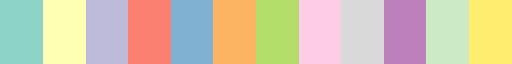

,feature,category,color
0,Year_Birth,Personal_info,"(0.5529411764705883, 0.8274509803921568, 0.780..."
1,Education,Personal_info,"(0.5529411764705883, 0.8274509803921568, 0.780..."
2,Income,Personal_info,"(0.5529411764705883, 0.8274509803921568, 0.780..."
3,Kidhome,Personal_info,"(0.5529411764705883, 0.8274509803921568, 0.780..."
4,Teenhome,Personal_info,"(0.5529411764705883, 0.8274509803921568, 0.780..."
5,MntWines,Amounts,"(1.0, 1.0, 0.7019607843137254)"
6,MntFruits,Amounts,"(1.0, 1.0, 0.7019607843137254)"
7,MntMeatProducts,Amounts,"(1.0, 1.0, 0.7019607843137254)"
8,MntFishProducts,Amounts,"(1.0, 1.0, 0.7019607843137254)"
9,MntSweetProducts,Amounts,"(1.0, 1.0, 0.7019607843137254)"


In [25]:

# Set the color for different categories of features

# dataframe with these columns [features, category, color]
set3 = cm.Set3.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set3)
#############################################################

data = {'feature': Xworkdf.columns}
feature_cat_df = pd.DataFrame(data)

cat_dict = {'Year_Birth': 'Personal_info', 
            'Income': 'Personal_info', 
            'Kidhome': 'Personal_info', 
            'Teenhome': 'Personal_info', 
            'MntWines': 'Amounts', 
            'MntFruits': 'Amounts',
            'MntMeatProducts': 'Amounts', 
            'MntFishProducts': 'Amounts', 
            'MntSweetProducts': 'Amounts',
            'MntGoldProds': 'Amounts', 
            'NumWebPurchases': 'Numbers', 
            'NumCatalogPurchases': 'Numbers',
            'NumStorePurchases':'Numbers',
            'NumWebVisitsMonth': 'Numbers', 
            'Education': 'Personal_info',
            'Marital_Status_Absurd': 'Personal_info',
            'Marital_Status_Alone': 'Personal_info',
            'Marital_Status_Divorced': 'Personal_info', 
            'Marital_Status_Married': 'Personal_info',
            'Marital_Status_Single': 'Personal_info', 
            'Marital_Status_Together': 'Personal_info',
            'Marital_Status_Widow': 'Personal_info', 
            'Marital_Status_YOLO': 'Personal_info'
}

feature_cat_df['category'] = pd.Series([cat_dict[t] for t in feature_cat_df['feature']])

cat_colors = {
    'Personal_info': set3[0],
    'Amounts': set3[1],
    'Numbers': set3[2],
}

feature_cat_df['color'] = feature_cat_df['category'].map(cat_colors)

display(feature_cat_df)

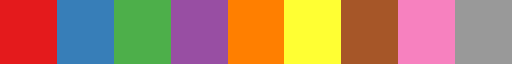

,NumDealsPurchases,color
0,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."
2,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."
3,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
4,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
...,...,...
1488,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1489,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1490,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1491,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."


In [26]:
# Set the color for different person wrt AcceptedCmp labels

set1 = cm.Set1.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set1)
#############################################################

# label of interest
interesting_labels = 'NumDealsPurchases'

label_df = pd.DataFrame(workdf['NumDealsPurchases'])

label_dict = {
    True: set1[0],  # Condition > 2
    False: set1[1]   # Condition <= 2
}
label_df['NumDealsPurchases'] = label_df['NumDealsPurchases'] > 2

label_df['color'] = label_df['NumDealsPurchases'].map(label_dict)

label_df

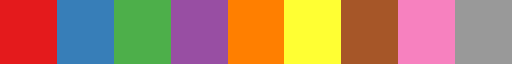

,Recency,color
0,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."
1,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."
2,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
3,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
4,True,"(0.8941176470588236, 0.10196078431372549, 0.10..."
...,...,...
1488,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1489,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1490,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1491,False,"(0.21568627450980393, 0.49411764705882355, 0.7..."


In [27]:

set1 = cm.Set1.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set1)
#############################################################

# label of interest
interesting_labels = 'Recency'

label_df = pd.DataFrame(workdf['Recency'])

label_dict = {
    True: set1[0],  # Condition > 2
    False: set1[1]   # Condition <= 2
}
label_df['Recency'] = label_df['Recency'] > 49

label_df['color'] = label_df['Recency'].map(label_dict)

label_df

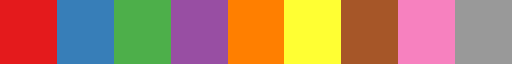

,Recency,NumDealsPurchases,color
0,60,1,"(0.21568627450980393, 0.49411764705882355, 0.7..."
1,84,5,"(0.8941176470588236, 0.10196078431372549, 0.10..."
2,36,3,"(0.30196078431372547, 0.6862745098039216, 0.29..."
3,0,2,"(0.596078431372549, 0.3058823529411765, 0.6392..."
4,98,2,"(0.21568627450980393, 0.49411764705882355, 0.7..."
...,...,...,...
1488,26,2,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1489,29,1,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1490,20,1,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1491,33,4,"(0.30196078431372547, 0.6862745098039216, 0.29..."


In [28]:
import pandas as pd
import matplotlib.cm as cm
from IPython.display import display

# Assuming you have already defined set1
set1 = cm.Set1.colors

# Displaying the colors of the chosen colormap
display(cm.Set1)

label_df = pd.DataFrame(workdf[['Recency', 'NumDealsPurchases']])

# dict
label_dict = {
    (True, True): set1[0],    # NumDealsPurchases > 2 && Recency > 49
    (False, True): set1[1],   # NumDealsPurchases <= 2 && Recency > 49
    (True, False): set1[2],   # NumDealsPurchases > 2 && Recency <= 49
    (False, False): set1[3]   # NumDealsPurchases <= 2 && Recency <= 49
}

# Applying the dictionary to create the 'color' column
conditions = (label_df['NumDealsPurchases'] > 2, label_df['Recency'] > 49)
label_df['color'] = [label_dict[cond] for cond in zip(*conditions)]

# Displaying the resulting dataframe
label_df


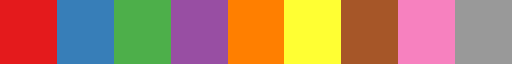

,Response,Complain,color
0,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
2,1,0,"(0.30196078431372547, 0.6862745098039216, 0.29..."
3,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
4,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
...,...,...,...
1488,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1489,1,0,"(0.30196078431372547, 0.6862745098039216, 0.29..."
1490,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1491,0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."


In [29]:
import pandas as pd
import matplotlib.cm as cm
from IPython.display import display

# Assuming you have already defined set1
set1 = cm.Set1.colors

# Displaying the colors of the chosen colormap
display(cm.Set1)

label_df = pd.DataFrame(workdf[['Response', 'Complain']])

# dict
label_dict = {
    (1, 1): set1[0],    # NumDealsPurchases > 2 && Recency > 49
    (0, 1): set1[1],   # NumDealsPurchases <= 2 && Recency > 49
    (1, 0): set1[2],   # NumDealsPurchases > 2 && Recency <= 49
    (0, 0): set1[3]   # NumDealsPurchases <= 2 && Recency <= 49
}

# Applying the dictionary to create the 'color' column
conditions = (label_df['Response'], label_df['Complain'])
label_df['color'] = [label_dict[cond] for cond in zip(*conditions)]

# Displaying the resulting dataframe
label_df

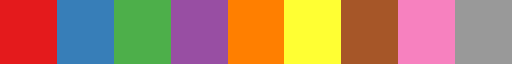

,AcceptedCmp,color
0,Other,"(1, 1, 1)"
1,Other,"(1, 1, 1)"
2,AcceptedCmp1,"(0.8941176470588236, 0.10196078431372549, 0.10..."
3,Other,"(1, 1, 1)"
4,Other,"(1, 1, 1)"
...,...,...
1488,Other,"(1, 1, 1)"
1489,AcceptedCmp5,"(1.0, 0.4980392156862745, 0.0)"
1490,Other,"(1, 1, 1)"
1491,Other,"(1, 1, 1)"


In [30]:
# Set the color for different person wrt AcceptedCmp labels

set1 = cm.Set1.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set1)
#############################################################

# label of interest
interesting_labels = [col for col in workdf.columns if col.startswith('AcceptedCmp')]

label_df = workdf[sorted(interesting_labels)].copy()

def find_feature_name(row):
    for col in label_df.columns:
        if row[col] == 1:
            return col
    return 'Other'

label_df['AcceptedCmp'] = label_df.apply(find_feature_name, axis=1)

label_df = label_df.drop(columns=interesting_labels)


label_dict = {'Other': (1,1,1),
              'AcceptedCmp1': set1[0] ,
              'AcceptedCmp3': set1[2],
              'AcceptedCmp4': set1[3],
              'AcceptedCmp5': set1[4],
              'AcceptedCmp2': set1[1],
}


label_df['color'] = label_df['AcceptedCmp'].map(label_dict)

label_df

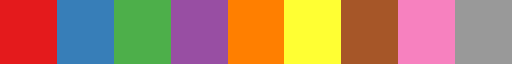

,Response,color
0,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
2,1,"(1.0, 0.4980392156862745, 0.0)"
3,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
4,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
...,...,...
1488,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1489,1,"(1.0, 0.4980392156862745, 0.0)"
1490,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."
1491,0,"(0.596078431372549, 0.3058823529411765, 0.6392..."


In [31]:
# Set the color for different person wrt AcceptedCmp labels

set1 = cm.Set1.colors

######### SHOWING THE COLORS OF THE CHOSEN COLORMAP #########
display(cm.Set1)
#############################################################

# label of interest
interesting_labels = 'Response'

label_df = pd.DataFrame(workdf['Response'])

label_dict = {0: set1[3],
              1: set1[4] }

label_df['color'] = label_df['Response'].map(label_dict)

label_df

## 3 - Preprocessing and full-PCA

### 3.1 - Standardize the features

In [32]:
# Create Xworkdf_std using the Standard scaler
Xworkdf_std = StandardScaler()
#fit
Xworkdf_std.fit(Xworkdf.values)
#transform
t_Xworkdf_std = Xworkdf_std.transform(Xworkdf.values)

# Create Xworksf_mm using the MinMax scaler
Xworksf_mm = MinMaxScaler()
#fit
Xworksf_mm.fit(Xworkdf.values)
#transform
t_Xworksf_mm = Xworksf_mm.transform(Xworkdf.values)

### 3.2 - First look at the variances (TODO)

### 3.3 - Full PCA

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


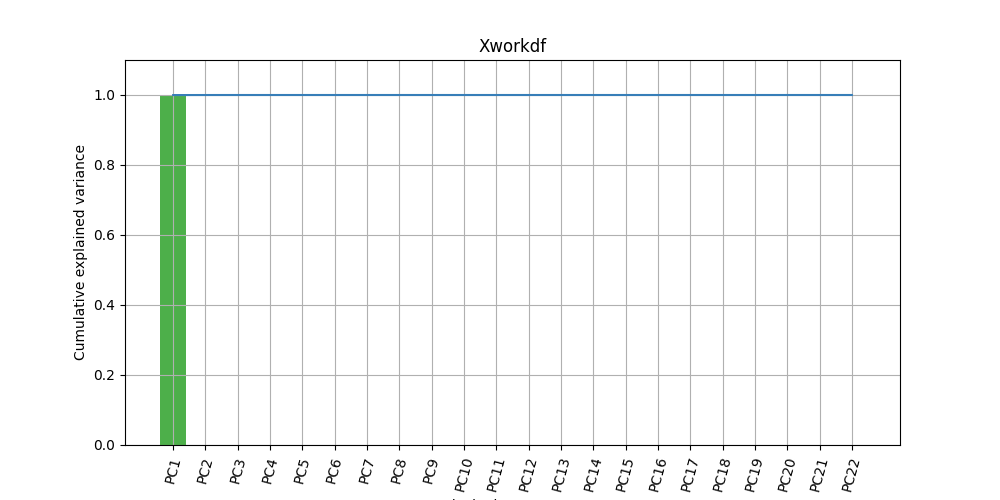

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


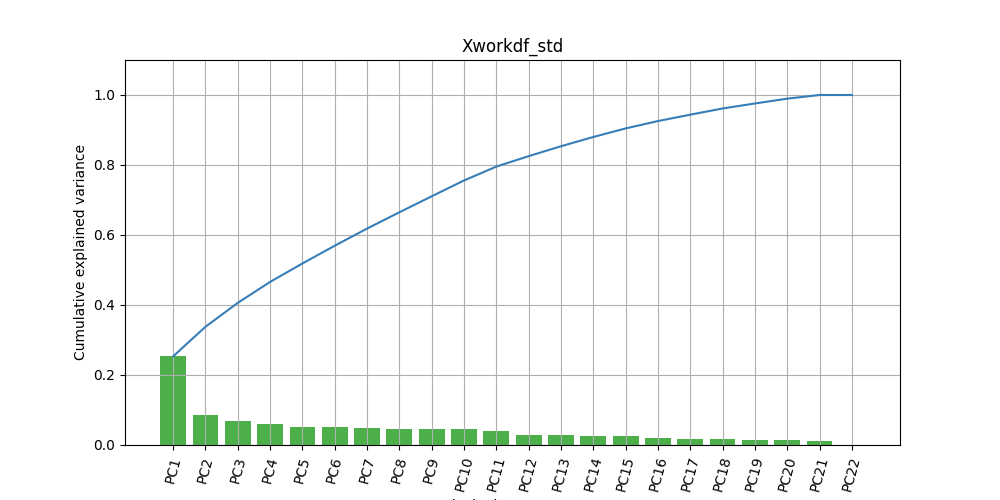

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


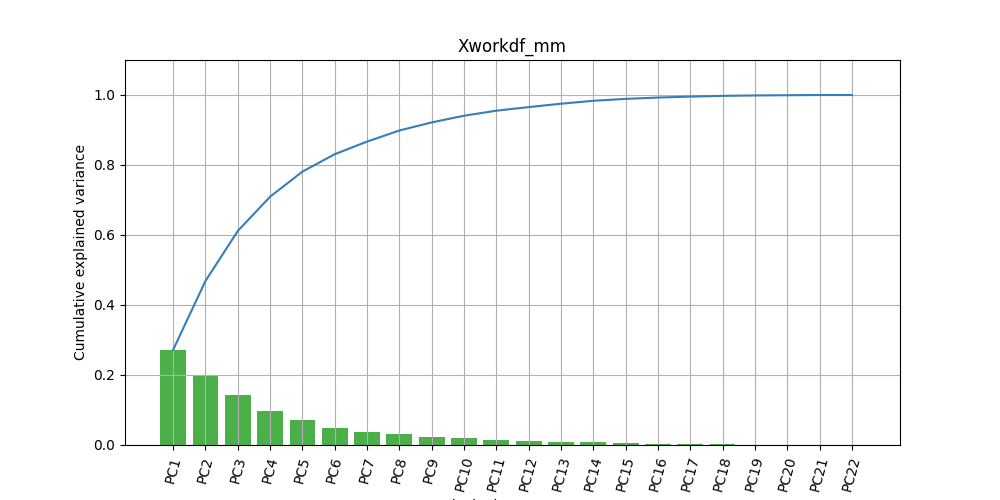

In [33]:
#Apply the “full” PCA1 to the DFs Xworkdf, Xworkdf_std, and Xworkdf_mm
pca_Xworkdf = PCA()
pca_Xworkdf_std = PCA()
pca_Xworkdf_mm = PCA()

pca_Xworkdf.fit(Xworkdf[features].values) 
pca_Xworkdf_std.fit(t_Xworkdf_std)
pca_Xworkdf_mm.fit(t_Xworksf_mm)

# color set
set1 = cm.Set1.colors


#plot the curve of the cumulative explained variance
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_Xworkdf.explained_variance_ratio_), c=set1[1])
plt.bar(height = pca_Xworkdf.explained_variance_ratio_, x = np.arange(22), color=set1[2])
plt.title('Xworkdf')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf.n_features_)],
           rotation = 75)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_Xworkdf_std.explained_variance_ratio_), c=set1[1])
plt.bar(height = pca_Xworkdf_std.explained_variance_ratio_, x = np.arange(22), color=set1[2])
plt.title('Xworkdf_std')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf_std.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf_std.n_features_)],
           rotation = 75)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_Xworkdf_mm.explained_variance_ratio_), c=set1[1])
plt.bar(height = pca_Xworkdf_mm.explained_variance_ratio_, x = np.arange(22), color=set1[2])
plt.title('Xworkdf_mm')
plt.ylim([0, 1.1])
plt.xticks(ticks=np.arange(pca_Xworkdf_mm.n_features_), 
           labels=[f'PC{i + 1}' for i in range(pca_Xworkdf_mm.n_features_)],
           rotation = 75)
plt.xlabel('Principal components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

## 4 - Dimensionality Reduction and Interpretation of the PCs

### 4.1 - Selection and display of PCs

In [51]:
m_star_std = 2 # m' of Xworkdf_std
m_star_mm = 2 # m' of Xworkdf_mm

m_std = min(m_star_std,5)
m_mm = min(m_star_mm,5)

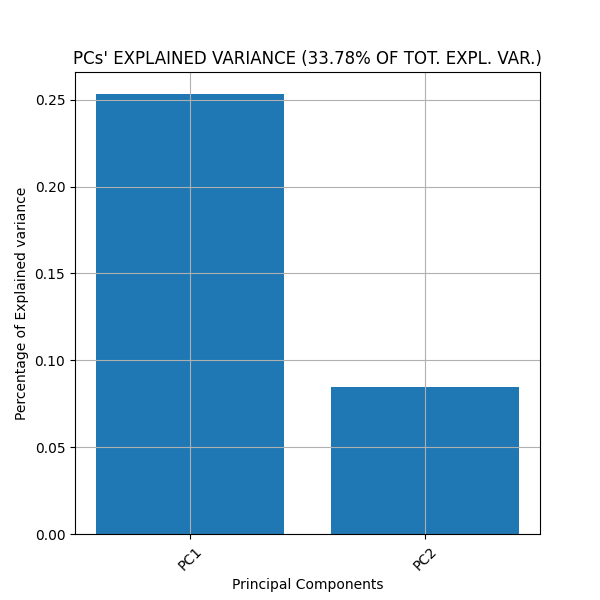

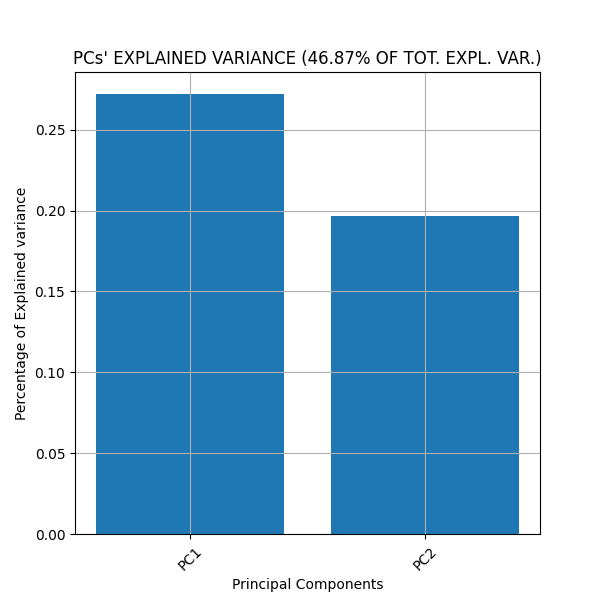

In [52]:
# PCA
pca_std = PCA(n_components = m_std)
pca_mm = PCA(n_components = m_mm)

# Fit the PCA of StandarScaler data
pca_std.fit(t_Xworkdf_std)

# Explained variance rounded to 2 decimals
round_expl_var_ratio_std = np.round(pca_std.explained_variance_ratio_.sum()*100,2)

# Barplots
plt.figure(figsize=(6, 6))
plt.bar(range(1,m_std+1), pca_std.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio_std}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1,m_std+1), 
           labels=[f'PC{i}' for i in range(1,m_std+1)],
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

# Fit the PCA of MinMaxScaler data
pca_mm.fit(t_Xworksf_mm)

# Explained variance rounded to 2 decimals
round_expl_var_ratio_mm = np.round(pca_mm.explained_variance_ratio_.sum()*100,2)

# Barplots
plt.figure(figsize=(6, 6))
plt.bar(range(1,m_mm+1), pca_mm.explained_variance_ratio_)
plt.title(f"PCs' EXPLAINED VARIANCE ({round_expl_var_ratio_mm}% OF TOT. EXPL. VAR.)")
plt.xticks(ticks=np.arange(1,m_mm+1), 
           labels=[f'PC{i}' for i in range(1,m_mm+1)],
           rotation=45)
plt.xlabel('Principal Components')
plt.ylabel('Percentage of Explained variance')
plt.grid()
plt.show()

### 4.2 - Interpretation of the PCs

#### 4.2.1 - Interpretation of the PCs for StandardScaler data

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


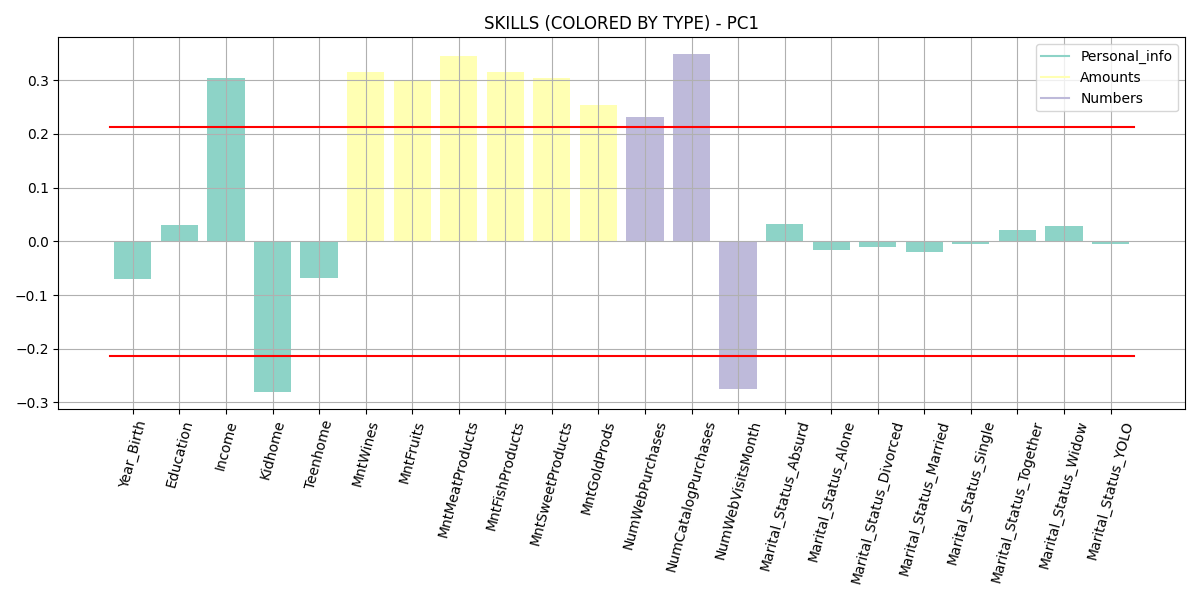


****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Income', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases', 'NumCatalogPurchases']

HIGH-VALUED NEGATIVE COMPONENTS: ['Kidhome', 'NumWebVisitsMonth']
*********************************************



/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


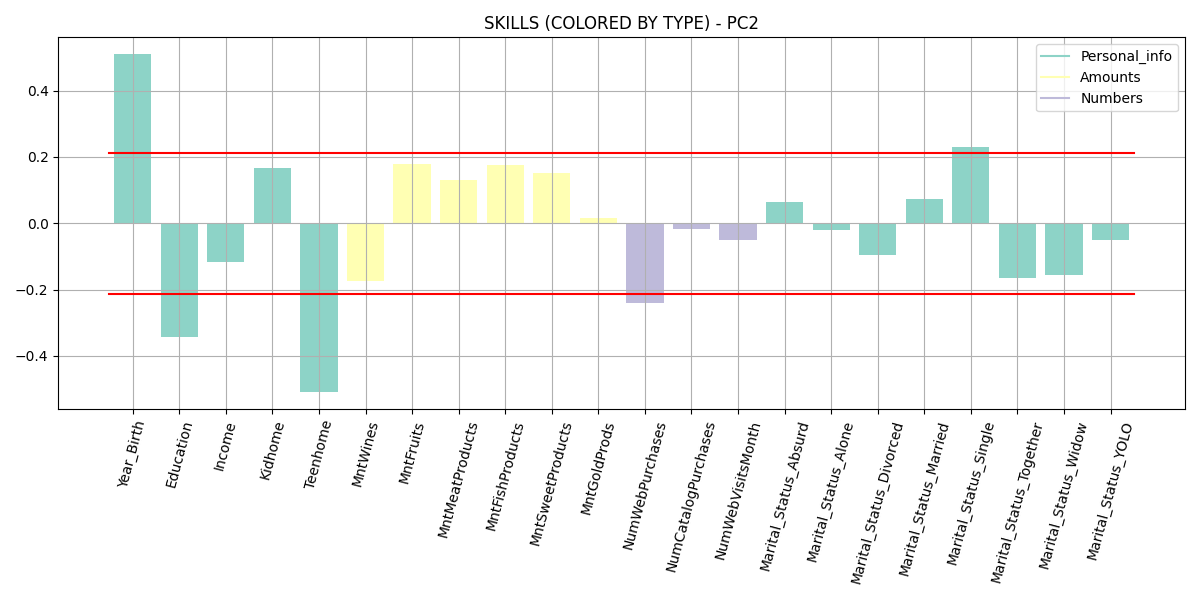


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Year_Birth', 'Marital_Status_Single']

HIGH-VALUED NEGATIVE COMPONENTS: ['Education', 'Teenhome', 'NumWebPurchases']
*********************************************



In [53]:
from matplotlib.lines import Line2D
# DEFINE EPSILON
eps = np.sqrt(1 / pca_std.n_features_)

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
cat_color = [feature_cat_df.loc[feature_cat_df['category'] == s]['color'].values[0] for s in feature_cat_df['category']]

# MAKE A CUSTOM LEGEND
cat_colors_legend = [Line2D([0], [0], color=cat_colors[k]) for k in cat_colors.keys()]

# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m_std):
    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(pca_std.n_features_), pca_std.components_[ii, :], color= cat_color)
    
    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_std.n_features_ - 0.5], [-eps, -eps], 'red')
    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(pca_std.n_features_),
               labels= features,
               rotation=75)
    plt.title(f'SKILLS (COLORED BY TYPE) - PC{ii + 1}')
    plt.legend(cat_colors_legend, [k for k in cat_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # THE SELECTION OF THE SKILLS WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    ind_great_pos_PCii = np.argwhere(pca_std.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_std.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [features[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [features[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')

In [54]:
pc_names_std = ['Kid product views(-) VS High spending (+)',
                'Family & High education (-) VS Adolescents'
               ]

#### 4.2.1 - Interpretation of the PCs for MinMaxScaler data

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)
/var/folders/6f/kjvx9lts3sz3x29562mtdxdw0000gn/T/ipykernel_38099/2726989379.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12, 6))


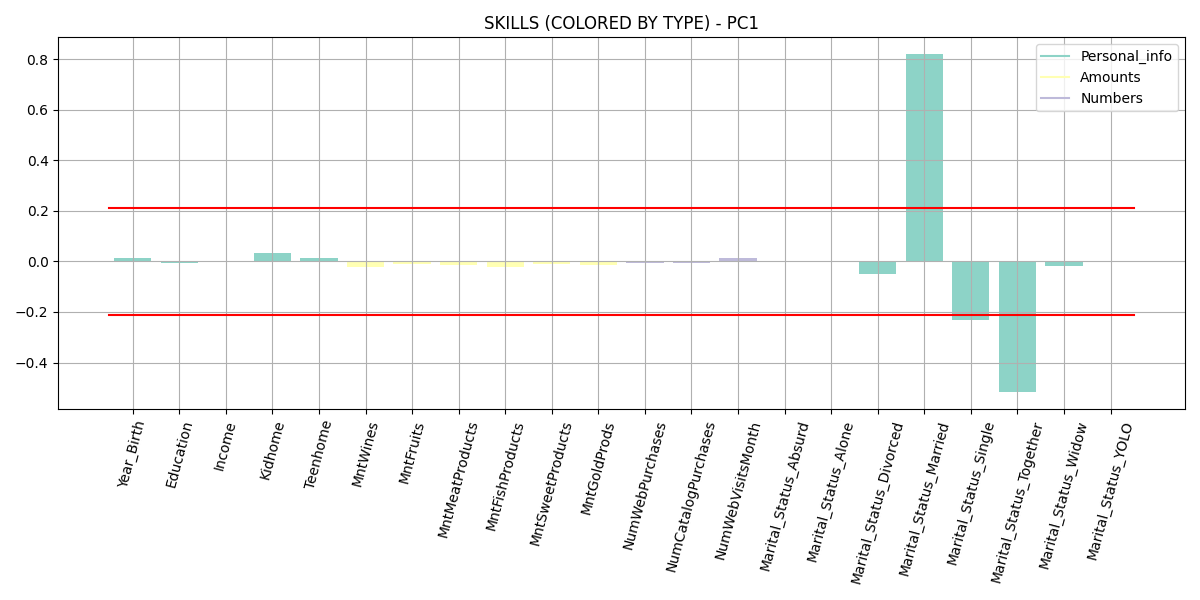

/Users/tommasomazzarini/Documents/venvs/venvCLA/lib/python3.12/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)



****************** PC1 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Marital_Status_Married']

HIGH-VALUED NEGATIVE COMPONENTS: ['Marital_Status_Single', 'Marital_Status_Together']
*********************************************



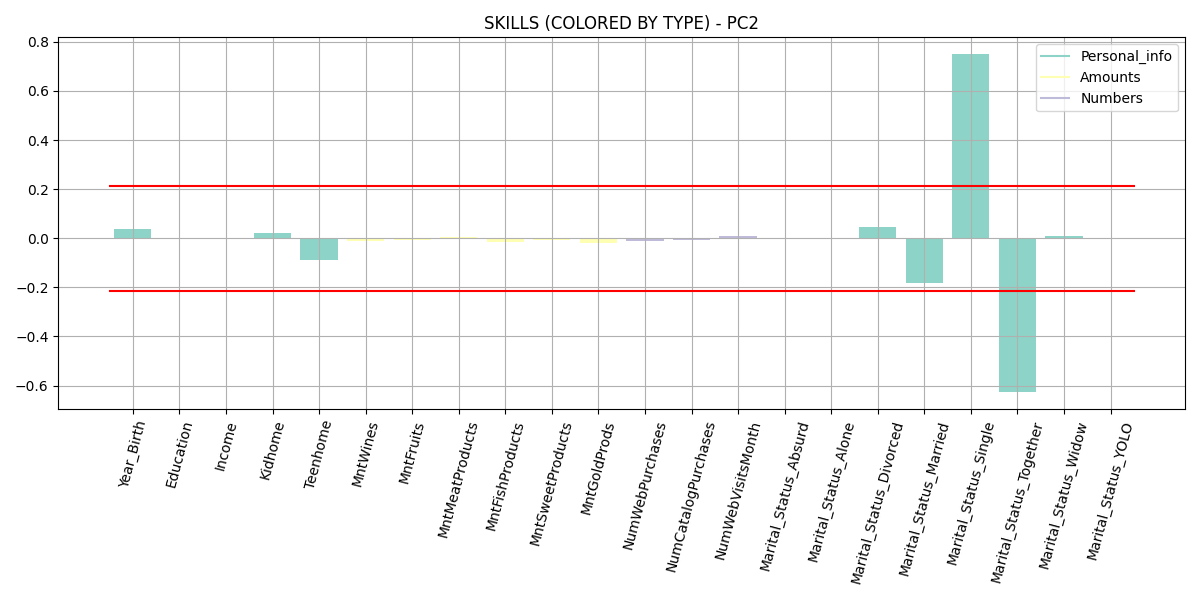


****************** PC2 **********************
HIGH-VALUED POSITIVE COMPONENTS: ['Marital_Status_Single']

HIGH-VALUED NEGATIVE COMPONENTS: ['Marital_Status_Together']
*********************************************



In [55]:
# DEFINE EPSILON
eps = np.sqrt(1 / pca_mm.n_features_)

# DEFINE THE LIST OF SKILL COLORS W.R.T. THE SKILL TYPES AND THE SKILL CATEGORIES
cat_color = [feature_cat_df.loc[feature_cat_df['category'] == s]['color'].values[0] for s in feature_cat_df['category']]

# MAKE A CUSTOM LEGEND
cat_colors_legend = [Line2D([0], [0], color=cat_colors[k]) for k in cat_colors.keys()]

# FOR-CYCLE TO GENERALIZE THE PLOT COMMANDS
for ii in range(m_mm):
    # MAKE THE BARPLOT WITH SKILL TYPE COLORS
    plt.figure(figsize=(12, 6))
    plt.bar(np.arange(pca_mm.n_features_), pca_mm.components_[ii, :], color=cat_color)
    # --- RED LINE DENOTING THE THRESHOLD [-eps, +eps] -----------------
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [eps, eps], 'red')
    plt.plot([-0.5, pca_mm.n_features_ - 0.5], [-eps, -eps], 'red')
    # ------------------------------------------------------------------
    plt.xticks(ticks=np.arange(pca_mm.n_features_),
               labels= features,
               rotation=75)
    plt.title(f'SKILLS (COLORED BY TYPE) - PC{ii + 1}')
    plt.legend(cat_colors_legend, [k for k in cat_colors.keys()])
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    # THE SELECTION OF THE SKILLS WITH CONTRIBUTE GREATER THAN THE THRESHOLD
    ind_great_pos_PCii = np.argwhere(pca_mm.components_[ii, :] >= eps).flatten()
    ind_great_neg_PCii = np.argwhere(pca_mm.components_[ii, :] <= -eps).flatten()
    
    great_pos_PCii = [features[i] for i in ind_great_pos_PCii]
    great_neg_PCii = [features[i] for i in ind_great_neg_PCii]
    
    print('')
    print(f'****************** PC{ii+1} **********************')
    print(f'HIGH-VALUED POSITIVE COMPONENTS: {great_pos_PCii}')
    print('')
    print(f'HIGH-VALUED NEGATIVE COMPONENTS: {great_neg_PCii}')
    print('*********************************************')
    print('')

In [56]:
pc_names_mm = ['Together & Single (-) VS Married (+)',
               'Together (-) VS Single (+)']

### 4.3 - Score graphs

#### 4.3.1 - Score graph for StandardScaler data

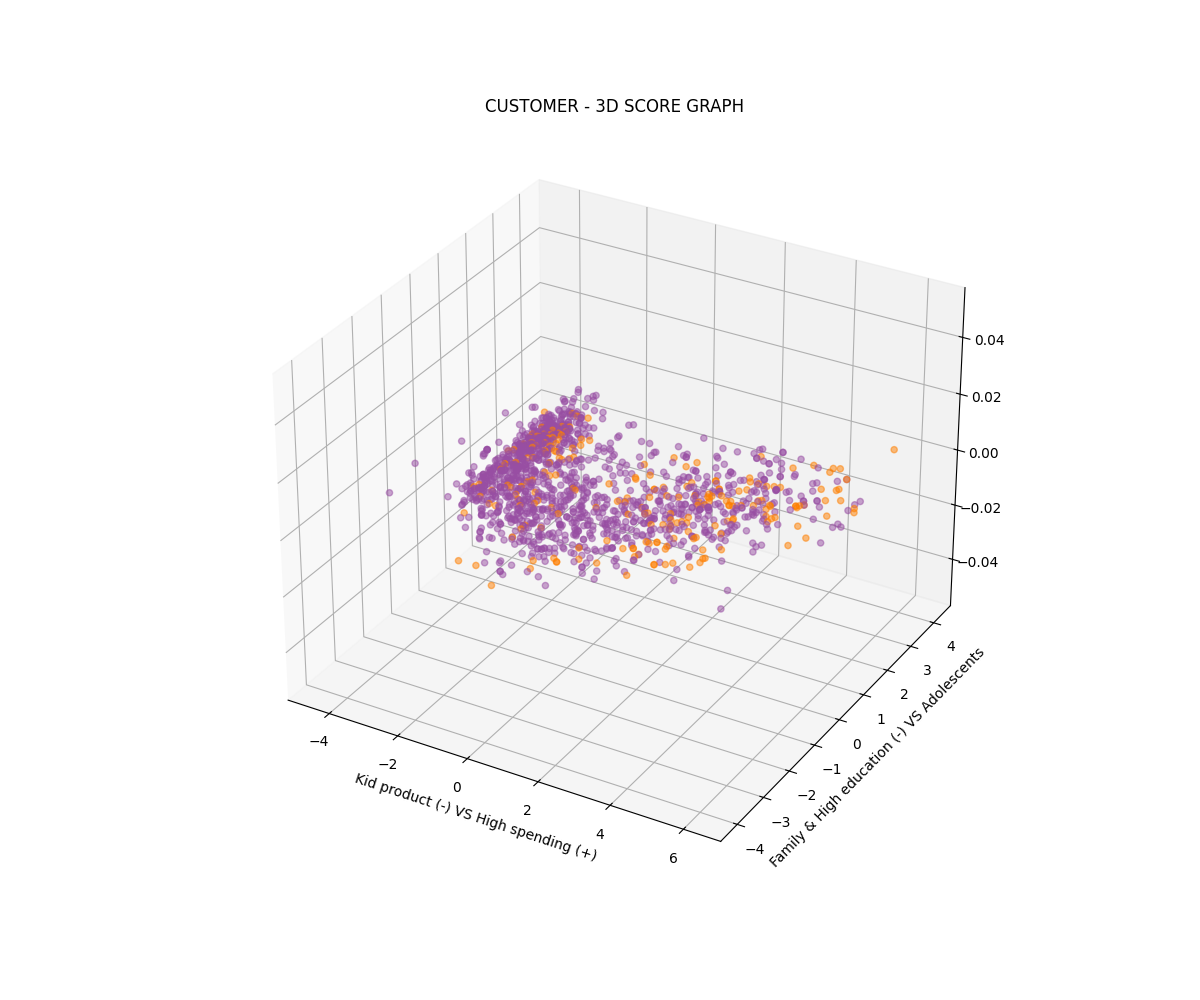

In [57]:
# PCA transform 
Yworkdf_std = pca_std.transform(t_Xworkdf_std)

# 3D Score graph
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], c=label_df['color'].values, alpha=0.5)

ax.set_xlabel(pc_names_std[0])
ax.set_ylabel(pc_names_std[1])

plt.title('CUSTOMER - 3D SCORE GRAPH')
plt.grid()
plt.show()

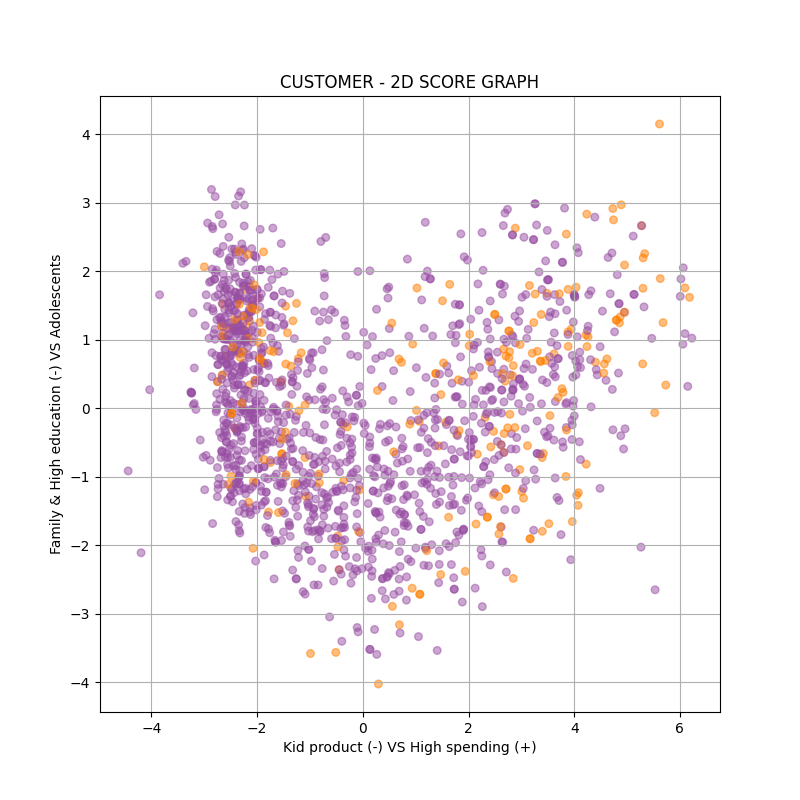

In [72]:
# 2D Score graph
sg = plt.figure(figsize=(8, 8))
as_sg = sg.add_subplot(111)

as_sg.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1], c=label_df['color'].values, alpha=0.5,s=30)

as_sg.set_xlabel(pc_names_std[0])
as_sg.set_ylabel(pc_names_std[1])
plt.title('CUSTOMER - 2D SCORE GRAPH')
plt.grid()
plt.show()


#### 4.3.2 - Score graph for MinMaxScaler data

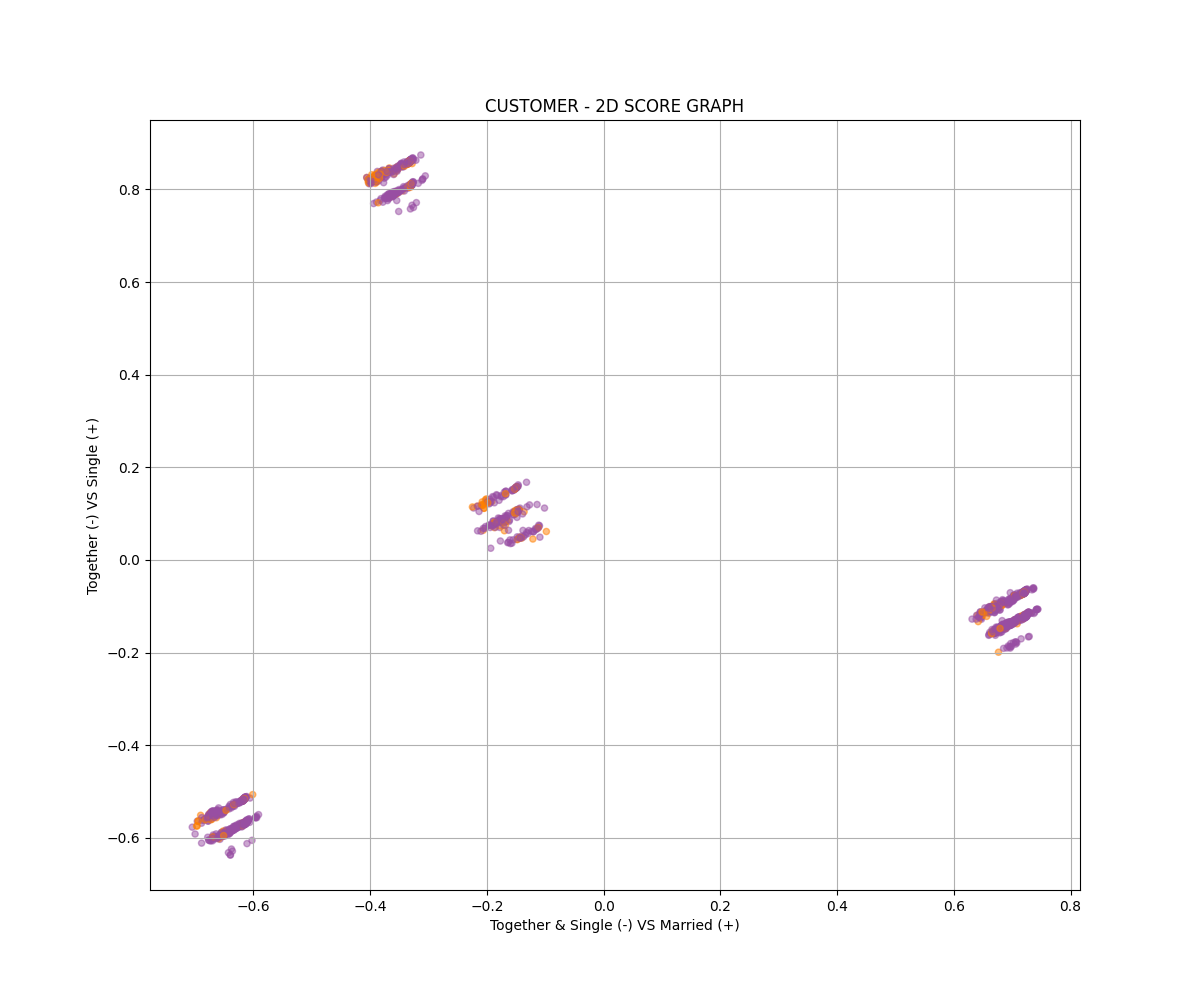

In [59]:
# PCA transform
Yworkdf_mm = pca_mm.transform(t_Xworksf_mm)

# 2D Score graph
sg = plt.figure(figsize=(12, 10))
as_sg = sg.add_subplot(111)

as_sg.scatter(Yworkdf_mm[:, 0], Yworkdf_mm[:, 1], s=20, c=label_df['color'].values, alpha=0.5)

as_sg.set_xlabel(pc_names_mm[0])
as_sg.set_ylabel(pc_names_mm[1])
plt.title('CUSTOMER - 2D SCORE GRAPH')
plt.grid()
plt.show()


### 4.4 - More accurate score graphs

### 4.5 - Analysis and comment

## 5 - K-Means

In [60]:
km_list_std = []
silcoeff_list_std = []
k_list_std = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list_std)):
    print(f'****************** START k-MEANS WITH k={k_list_std[i]} ******************')
    print('Computing...')
    km_list_std.append(KMeans(n_clusters=k_list_std[i], n_init=3, random_state=random_state))
    km_std = km_list_std[i]
    km_std.fit(Yworkdf_std)
    silcoeff_list_std.append(silhouette_score(Yworkdf_std,km_std.labels_))
    print(f'****************** END k-MEANS WITH k={k_list_std[i]} ******************')
    print('\n')
    

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_std = np.argmax(silcoeff_list_std)
k_std = k_list_std[i_best_std]
km_std = km_list_std[i_best_std]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list_std)} --> k = {k_std}') 
print('**************************************************************')

****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************


****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************


****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************


****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************


****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************


****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************


****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************


****************** START k-MEANS WITH k=10 ************

In [61]:
print(silcoeff_list_std)

[0.4576876926619413, 0.40642494641552973, 0.3790459998602401, 0.38859368736475297, 0.36803753043557463, 0.38205196477179454, 0.34416590417582493, 0.33761225090893976]


In [62]:
km_list_mm = []
silcoeff_list_mm = []
k_list_mm = list(range(3, 11))

# START THE FOR-CYCLE TO RUN THE k-MEANS AND MEASURING THE SILHOUETTE COEFFICIENT
for i in range(len(k_list_mm)):
    print(f'****************** START k-MEANS WITH k={k_list_mm[i]} ******************')
    print('Computing...')
    km_list_mm.append(KMeans(n_clusters=k_list_mm[i], n_init=3, random_state=random_state))
    km_mm = km_list_mm[i]
    km_mm.fit(Yworkdf_mm)
    silcoeff_list_mm.append(silhouette_score(Yworkdf_mm,km_mm.labels_))
    print(f'****************** END k-MEANS WITH k={k_list_mm[i]} ******************')
    print('\n')

# FIND THE BEST VALUE OF k AND THE BEST KMeans OBJECT
i_best_mm = np.argmax(silcoeff_list_mm)
k_mm = k_list_mm[i_best_mm]
km_mm = km_list_mm[i_best_mm]

# VISUALIZE THE RESULT
print('')
print('')
print('****************** RESULTS OF THE SEARCH... ******************')
print(f'BEST SILHOUETTE SCORE: {np.max(silcoeff_list_mm)} --> k = {k_mm}') 
print('**************************************************************')



****************** START k-MEANS WITH k=3 ******************
Computing...
****************** END k-MEANS WITH k=3 ******************


****************** START k-MEANS WITH k=4 ******************
Computing...
****************** END k-MEANS WITH k=4 ******************


****************** START k-MEANS WITH k=5 ******************
Computing...
****************** END k-MEANS WITH k=5 ******************


****************** START k-MEANS WITH k=6 ******************
Computing...
****************** END k-MEANS WITH k=6 ******************


****************** START k-MEANS WITH k=7 ******************
Computing...
****************** END k-MEANS WITH k=7 ******************


****************** START k-MEANS WITH k=8 ******************
Computing...
****************** END k-MEANS WITH k=8 ******************


****************** START k-MEANS WITH k=9 ******************
Computing...
****************** END k-MEANS WITH k=9 ******************


****************** START k-MEANS WITH k=10 ************

In [63]:
print(silcoeff_list_mm)

[0.8437449495168602, 0.9410379317028482, 0.7482244416952396, 0.6131232955079816, 0.5187796602578312, 0.55301573032446, 0.5827856208425526, 0.5180610266847833]


## 6 - Clusters and Centroid Interpretation and Visualization

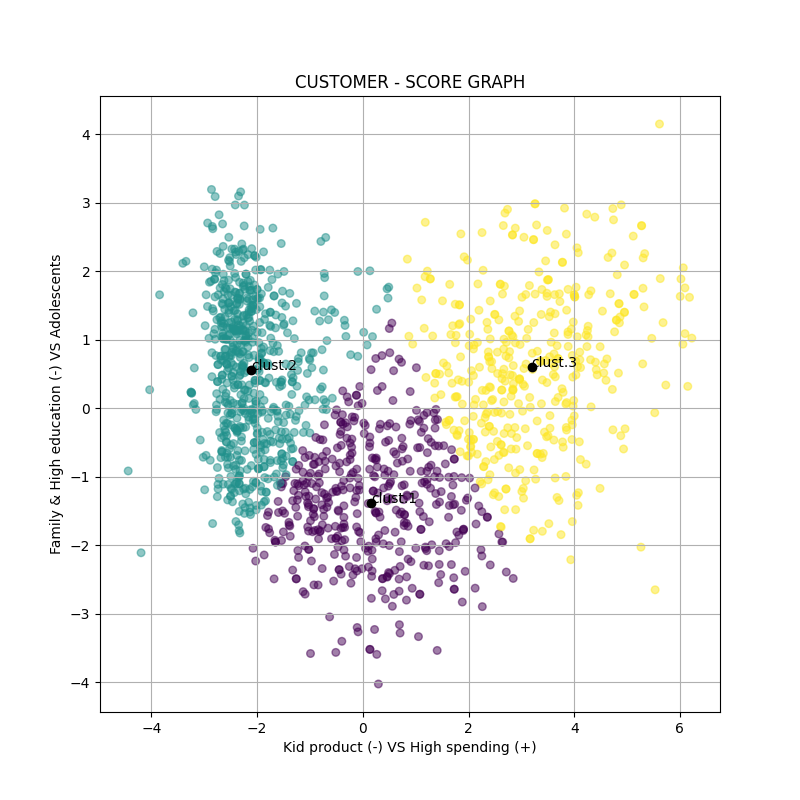

In [70]:
# Score graph with centroids for MinMaxScaler data
labels_std = km_std.labels_

sg_km = plt.figure(figsize=(8, 8))
ax_sg_km = sg_km.add_subplot(111)
ax_sg_km.scatter(Yworkdf_std[:, 0], Yworkdf_std[:, 1],s=30,c=km_std.labels_, alpha=0.5)
ax_sg_km.scatter(km_std.cluster_centers_[:,0], km_std.cluster_centers_[:,1], c='black')
for kk in range(k_std):
    ax_sg_km.text(km_std.cluster_centers_[kk, 0], km_std.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('CUSTOMER - SCORE GRAPH')
ax_sg_km.set_xlabel(pc_names_std[0])
ax_sg_km.set_ylabel(pc_names_std[1])
#plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

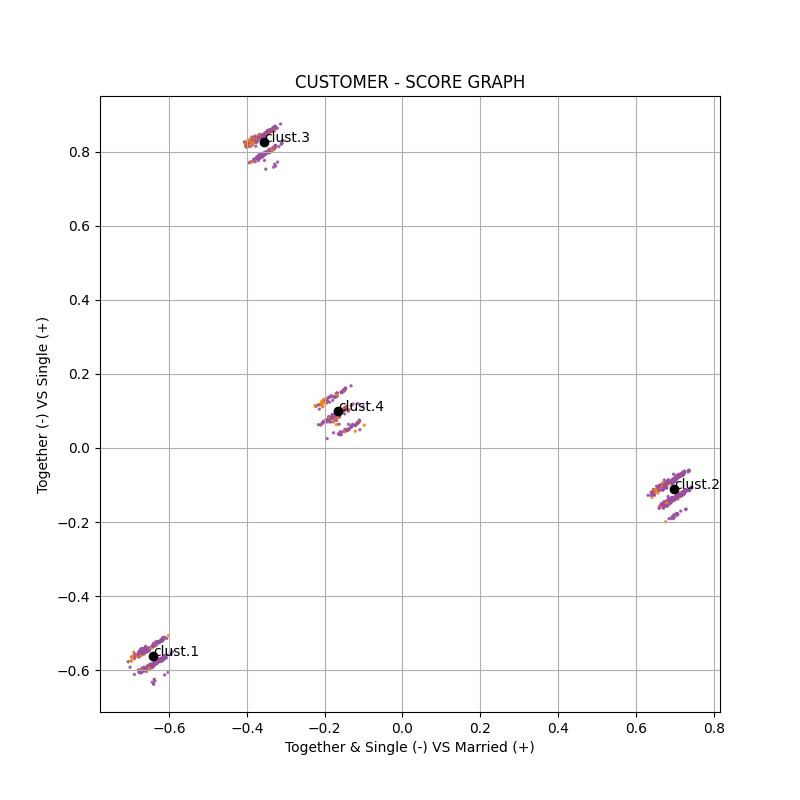

In [65]:
# Score graph with centroids for MinMaxScaler data
labels_mm = km_mm.labels_

sg_km = plt.figure(figsize=(8, 8))
ax_sg_km = sg_km.add_subplot(111)
ax_sg_km.scatter(Yworkdf_mm[:, 0], Yworkdf_mm[:, 1], s=2,c=label_df['color'].values ,alpha=0.8)
ax_sg_km.scatter(km_mm.cluster_centers_[:,0], km_mm.cluster_centers_[:,1], c='black')
for kk in range(k_mm):
    ax_sg_km.text(km_mm.cluster_centers_[kk, 0], km_mm.cluster_centers_[kk, 1], f'clust.{kk+1}')
plt.title('CUSTOMER - SCORE GRAPH')
ax_sg_km.set_xlabel(pc_names_mm[0])
ax_sg_km.set_ylabel(pc_names_mm[1])
#plt.legend(genpos_colors_legend, [k for k in genpos_colors.keys()])
plt.grid()
plt.show()

In [66]:
k_std

3

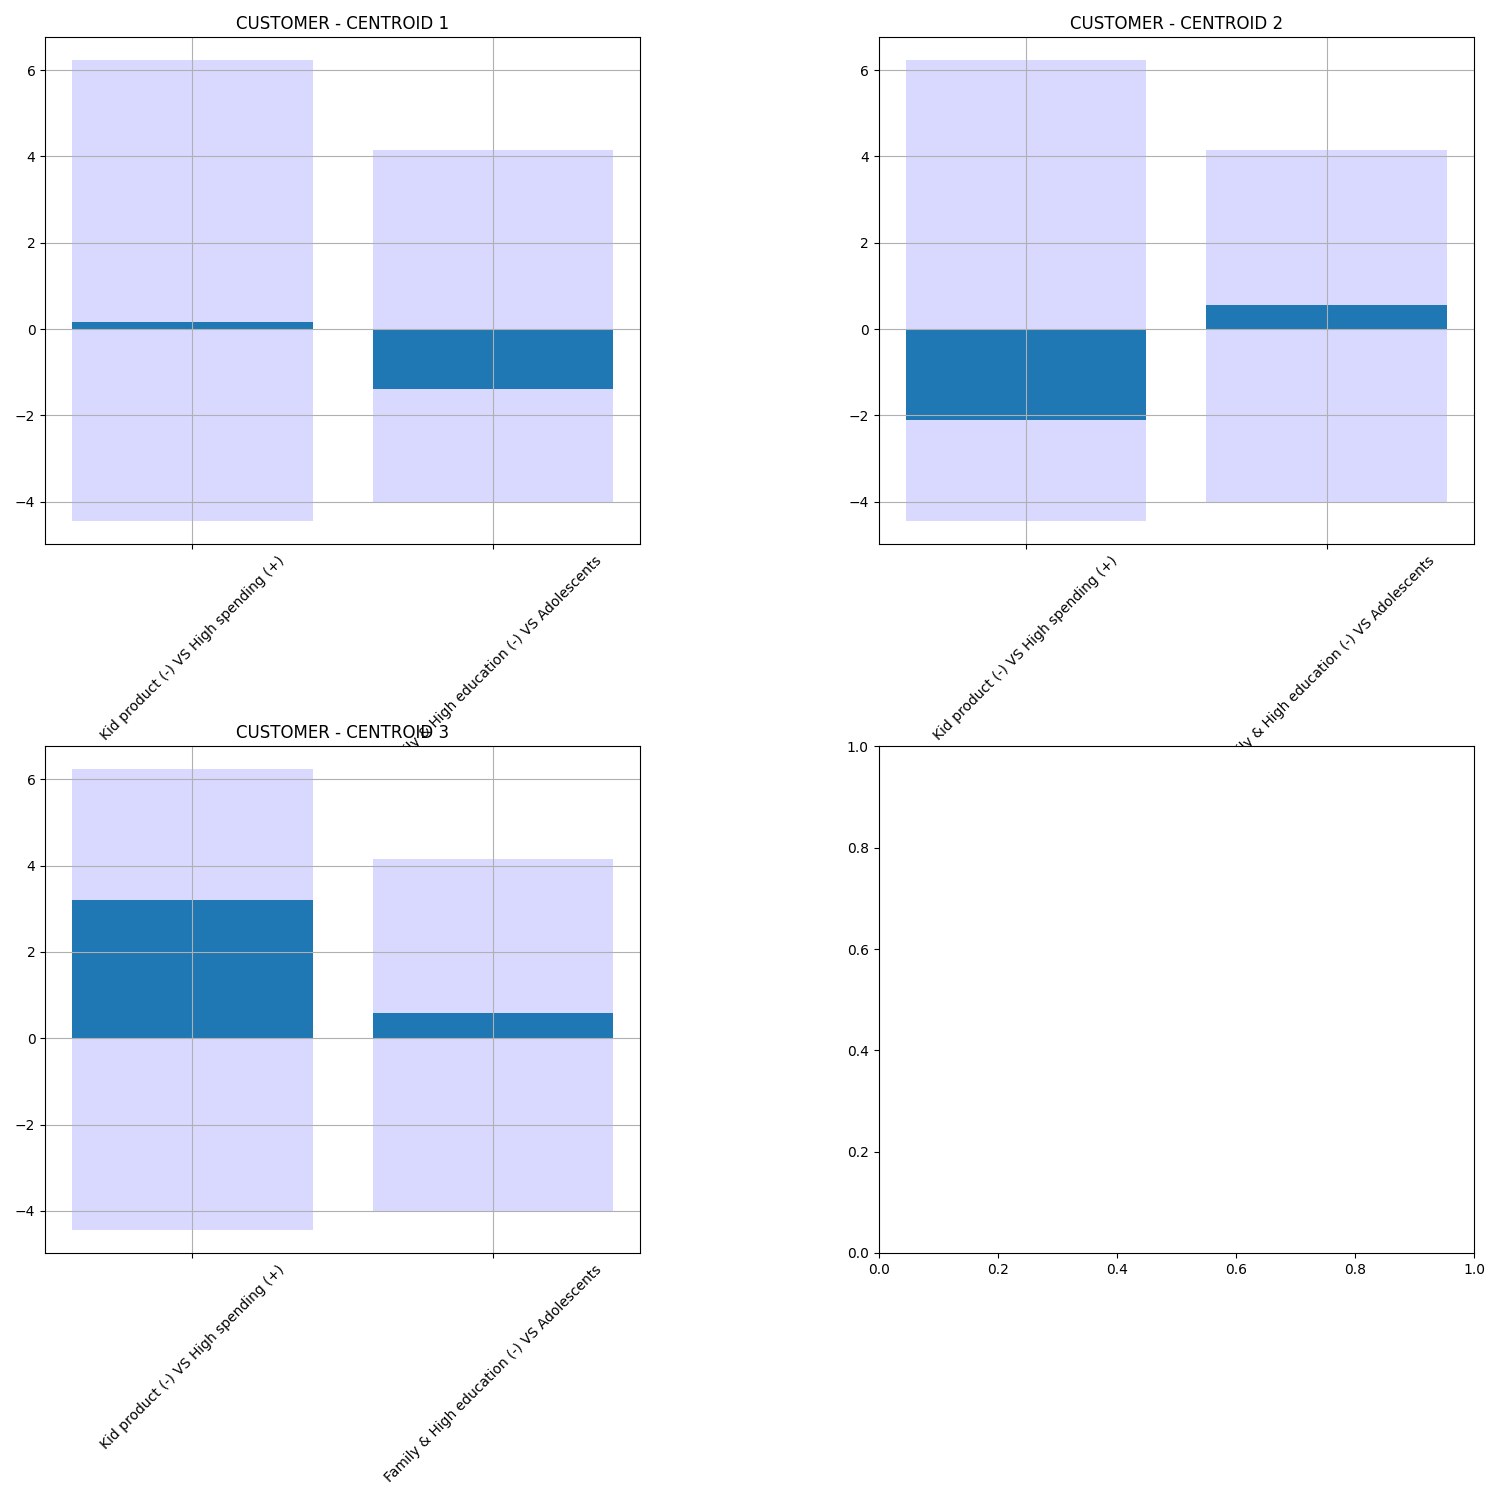

In [77]:
maxs_y = Yworkdf_std.max(axis=0) 
mins_y = Yworkdf_std.min(axis=0) 

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(2,2, figsize=(15, 15))

ax_centroids = ax_centroids.flatten()

for ii in range(k_std):
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_std.cluster_centers_.shape[1]), km_std.cluster_centers_[ii,:])
    ax_centroids[ii].set_xticks(ticks=np.arange(km_std.cluster_centers_.shape[1]))
    ax_centroids[ii].set_xticklabels(labels=pc_names_std, rotation = 45)
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'CUSTOMER - CENTROID {ii+1}')
plt.subplots_adjust(wspace=0.1, hspace=0.4)



In [68]:
cluster_names_std = ['Other',
                     'Premium Customer',
                     'Active Family Customer',
                     ]

In [69]:
k_mm

4

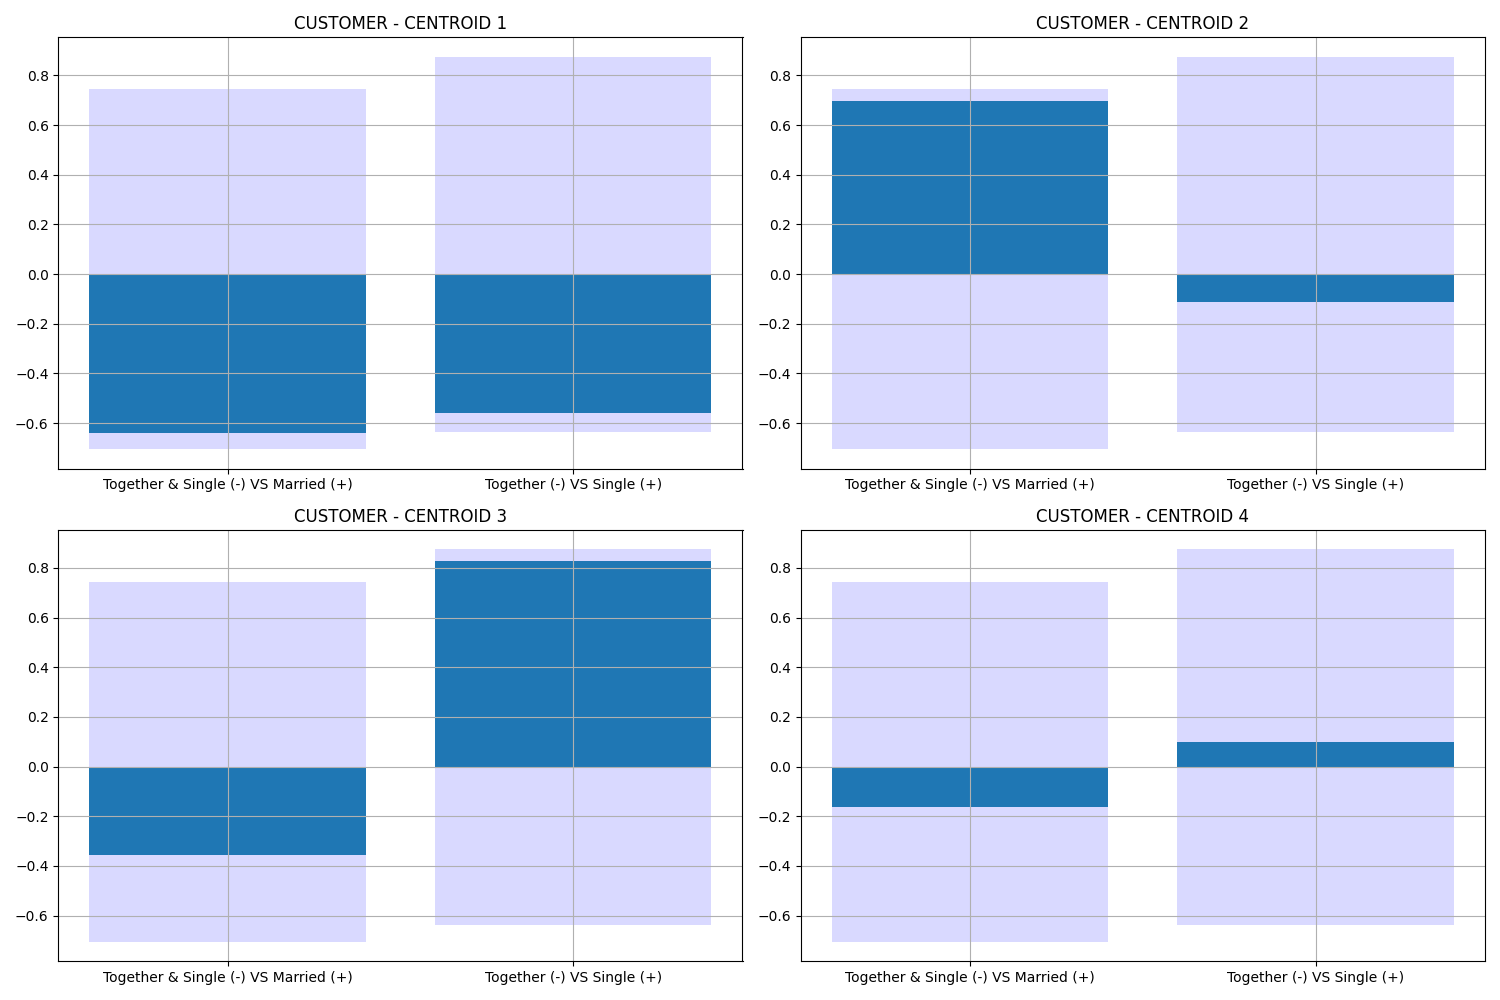

In [78]:
# COMPUTE THE MAX/MIN VALUES IN THE PC-SPACE
maxs_y = Yworkdf_mm.max(axis=0) 
mins_y = Yworkdf_mm.min(axis=0) 

# MAKE THE BARPLOTS OF THE CENTROIDS
fig_centroids, ax_centroids = plt.subplots(2,2, figsize=(15, 10))

ax_centroids = ax_centroids.flatten()

for ii in range(k_mm):
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), maxs_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), mins_y, color='blue', alpha=0.15)
    ax_centroids[ii].bar(np.arange(km_mm.cluster_centers_.shape[1]), km_mm.cluster_centers_[ii,:])
    ax_centroids[ii].set_xticks(ticks=np.arange(km_mm.cluster_centers_.shape[1]))
    ax_centroids[ii].set_xticklabels(labels=pc_names_mm)
    ax_centroids[ii].grid(visible=True, which='both')
    plt.tight_layout()
    ax_centroids[ii].set_title(f'CUSTOMER - CENTROID {ii+1}')

In [ ]:
cluster_names_mm = ['Family Customer',
                    'Single Customer',
                    'Active Customer',
                    ''
                    ]

## 7 - Clusters and Centroid Evaluation
- For both the DFs, perform an internal and an external evaluation of the clusterings obtained
  - Measure the silhouette scores of the clusters (internal evaluation);
  - perform an external evaluation of the clusters analyzing and plotting the distribution of the labels (view lesson 22/12/23)
  - Comment the results. Compare the results obtained from Xworkdf std and Xworkdf mm and comment them

In [79]:
silscores = silhouette_samples(Yworkdf_std, km_std.labels_)
cluster_silscores = [np.mean (silscores [km_std.labels_ == kk]) for kk in range (k_std) ]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list_std)]), index=cluster_names_std + ['Global'], columns=['Sil. Score' ]))

,Sil. Score
Other,0.381790
Premium Customer,0.511532
Active Family Customer,0.452948
Global,0.457688


In [80]:
silscores = silhouette_samples(Yworkdf_mm, km_mm.labels_)
cluster_silscores = [np.mean (silscores [km_mm.labels_ == kk]) for kk in range (k_mm) ]
display(pd.DataFrame(np.array(cluster_silscores + [np.max(silcoeff_list_mm)]), index=cluster_names_mm + ['Global'], columns=['Sil. Score' ]))

NameError: name 'cluster_names_mm' is not defined

In [ ]:
#EXTERNAL EVALUATION ????